In [1]:
import requests
from random import choice
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [2]:
URL_TEMPLATE = 'http://iccluster118.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'

def get_user(user_id):
    url = URL_TEMPLATE.format(user_id=user_id)
    response = requests.get(url)
    return response.json()

In [15]:
start_node = "f30ff3966f16ed62f5165a229a19b319"
n_nodees = 1000

In [16]:
user = get_user(start_node)

ages = []
estimates = []

for i in range(n_nodees):
    age = user['age']
    ages.append(age)
    
    estimates.append(np.mean(ages))
    
    next_user_id = choice(user['friends'])
    user = get_user(next_user_id)

In [22]:
print("The mean age of nodes visited in the random walk is {:.2f}".format(np.mean(ages)))

The mean age of nodes visited in the random walk is 22.38


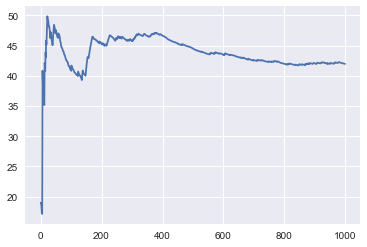

In [23]:
plt.plot(estimates)
plt.show()

#### Exercise 2.8

We observe that our estimate is far off the true average of 43.3 years. One explanation of this is that our random walk is more likely to visit nodes which many friends, which seemingly gives a bias towards younger people. We try to get a more accurate estimate by getting an 'unbiased estimate', where the node statistic (age) is normalized by the node degree.

In [19]:
n_nodes = 1000

def unbiased_estimate(ages, degrees):
    
    num = sum(ages / degrees)
    denum = sum(np.ones(len(degrees)) / degrees)
    
    return num / denum

user = get_user(start_node)
ages, degrees = np.array([]), np.array([])
estimates = []

for i in range(n_nodes):
    age = user['age']
    friends = user['friends']
    degree = len(friends)
    
    ages = np.append(age, ages)
    degrees = np.append(degree, degrees)
    
    estimate = unbiased_estimate(ages, degrees)
    estimates.append(estimate)
    
    next_user_id = choice(user['friends'])
    user = get_user(next_user_id)
    

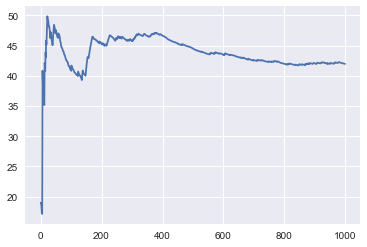

In [20]:
plt.plot(estimates)
plt.show()

In [25]:
print("Using the unbiased estimate, we end up with an estimate of {:.2f}.".format(unbiased_estimate(ages, degrees)))

Using the unbiased estimate, we end up with an estimate of 41.97.


We observe that we are now only 1.3 years away from the true average age, which is much closer than the original estimate.